## The normal distribution

[pdf, cdf, ppf.com](http://pytolearn.csd.auth.gr/d1-hyptest/11/distros.html)<br>
[normal distribution.com](http://pytolearn.csd.auth.gr/d1-hyptest/11/norm-distro.html)

#### Distribution of Amir's sales
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

Both pandas as pd and matplotlib.pyplot as plt are loaded and amir_deals is available.

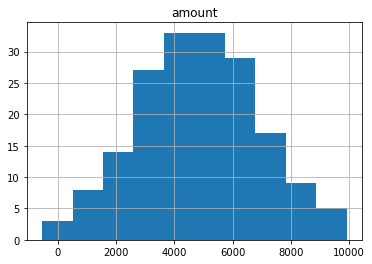

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Histogram of amount with 10 bins and show plot
amir_deals = pd.read_csv("amir_deals.csv")
amir_deals.hist("amount", bins = 10) # or  amir_deals["amount"].hist(bins = 10)
plt.show()


#### Question
Which probability distribution do the sales amounts most closely follow?

a.Uniform<br>
b.Binomial<br>
<strong>c.Normal</strong><br>
d.None of the above

#### Probabilities from the normal distribution
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

norm from scipy.stats is imported as well as pandas as pd. The DataFrame amir_deals is loaded.

In [5]:
from scipy.stats import norm

In [16]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000) #cumulative distribution function .cdf(x, mean, std)
print("P(deal<7500):",prob_less_7500, "\n")

# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000,5000,2000)#cumulative distribution function .cdf(x, mean, std)
print("P(deal>1000):", prob_over_1000, "\n")

# Probability of deal between 3000 and 7000# 
prob_3000_to_7000 = norm.cdf(7000, 5000,2000) - norm.cdf(3000,5000,2000)#cumulative distribution function .cdf(x, mean, std)
print("P(3000<deal<7000):",prob_3000_to_7000, "\n")

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)#percent point function (or inverse cumulative distribution function) .ppf(p(x),mean,std)
print("ppf:",pct_25)

P(deal<7500): 0.8943502263331446 

P(deal>1000): 0.9772498680518208 

P(3000<deal<7000): 0.6826894921370859 

ppf: 3651.0204996078364


#### Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

In addition, norm from scipy.stats, pandas as pd, and matplotlib.pyplot as plt are loaded.

In [21]:
from scipy.stats import norm

new mean: 6000.0 

new sd: 2600.0 

new sales: [ 7030.00240028 10822.49573473  8862.75283498 10426.48066004
  4078.47763349  3729.16290211  7127.49209003  7778.73898421
  3952.07951867  6784.37646698  5435.3431384   3384.90788631
  8777.24141401  6817.19561274  6627.03787236  3580.87666008
  8202.67453208  8494.22982761  6755.79134309  5343.0817299
  1664.76527244  6084.03287474  9709.25540822  6010.04610761
  1397.44131613 10647.61752446  8997.63422378  4761.60873663
  5487.06745595 12714.0168228   3453.8966116   6254.91912115
  3836.23434427  6340.01150952  9217.61779059  6520.20651204] 



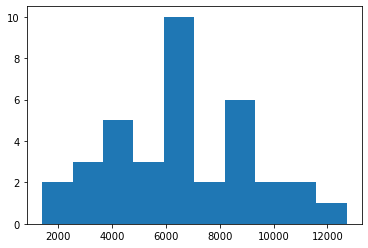

In [26]:
# Calculate new average amount with an increase of %20
new_mean = 5000 + 5000 * 0.2
print("new mean:",new_mean,"\n")

# Calculate new standard deviation with an increase of %30
new_sd = 2000 + 2000 * 0.3
print("new sd:", new_sd, "\n")

#Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of 
#new_mean and a standard deviation of new_sd.
new_sales = norm.rvs(new_mean, new_sd, 36)
print("new sales:", new_sales, "\n")

# Create histogram and show
plt.hist(new_sales)
plt.show()




#### Which market is better?
The key metric that the company uses to evaluate salespeople is the percent of sales they make over 1000 dollars since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of 5000 dollars and a standard deviation of 2000 dollars, and Amir's predicted amounts in next quarter's market have a mean of 6000 dollars and a standard deviation of 2600 dollars.

norm from scipy.stats is imported.

Based only on the metric of percent of sales over 1000 dollars, does Amir perform better in the current market or the predicted market?

In [28]:
print("current market:", 1-norm.cdf(1000,5000,2000), "\n")

print("next quarter predicted market:",1-norm.cdf(1000,6000,2600),)


current market: 0.9772498680518208 

next quarter predicted market: 0.9727648049862613


Possible Answers

a.Amir performs much better in the current market.<br>
b.Amir performs much better in next quarter's predicted market.<br>
<strong>c.Amir performs about equally in both markets.</strong>

## Exploring Central Limit Theorem (CLT)

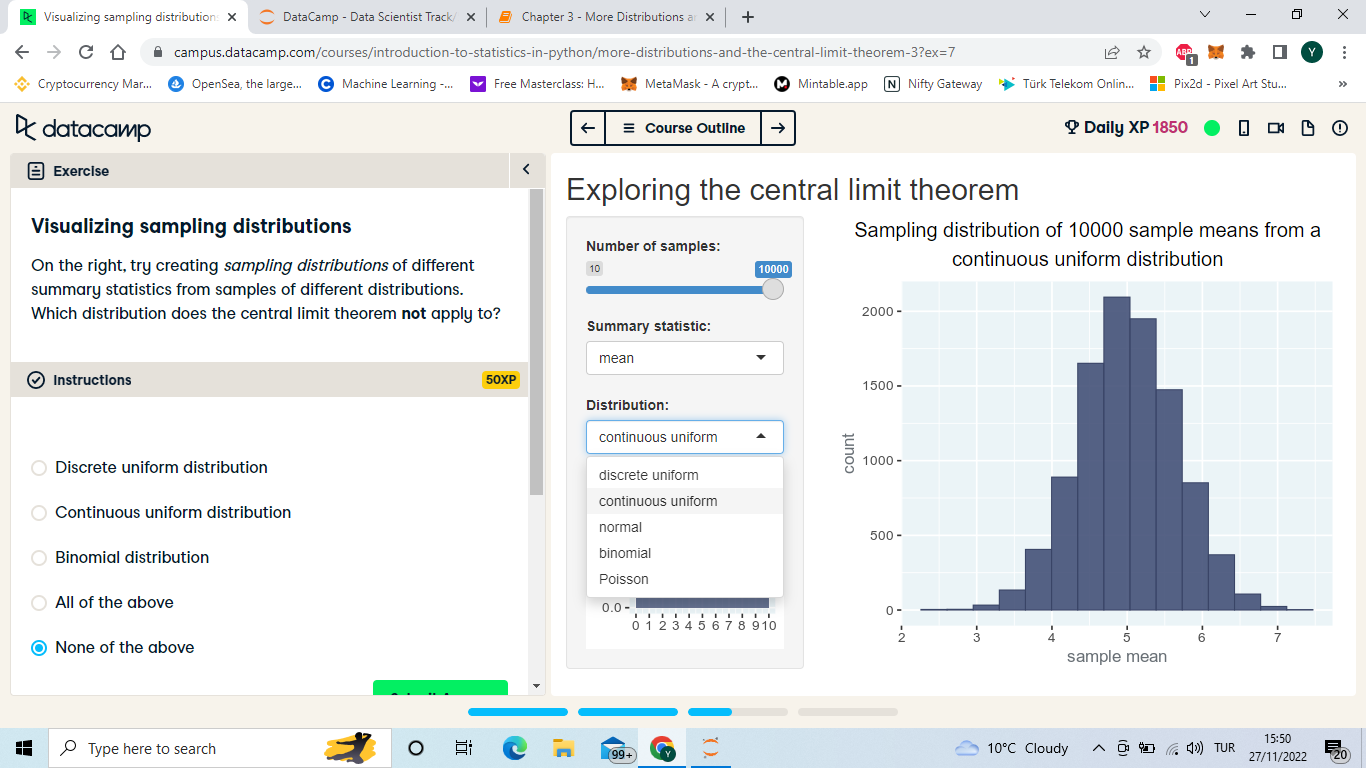

#### Course Outline

The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

pandas as pd, numpy as np, and matplotlib.pyplot as plt are loaded and amir_deals is available.

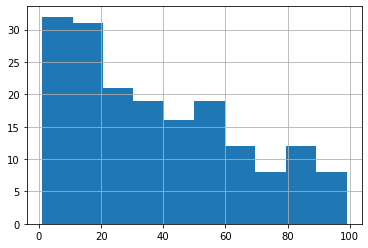

In [29]:
# Create a histogram of num_users and show
amir_deals["num_users"].hist()
plt.show()

In [33]:
import numpy as np

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals["num_users"].sample(20, replace = True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


[37.75, 41.6, 39.65, 38.65, 38.45, 31.15, 24.95, 37.15, 38.55, 34.55, 36.1, 46.35, 45.75, 40.5, 29.65, 54.4, 32.95, 40.45, 43.5, 30.25, 32.05, 41.6, 44.35, 39.6, 39.9, 40.1, 35.75, 27.3, 29.0, 37.75, 41.65, 39.25, 32.1, 42.65, 33.3, 30.95, 32.55, 30.95, 35.65, 38.45, 39.7, 34.35, 33.7, 36.25, 40.3, 35.65, 32.8, 53.6, 40.05, 36.6, 53.0, 38.7, 53.1, 43.55, 32.55, 45.3, 36.85, 36.15, 37.4, 38.25, 33.1, 32.15, 38.75, 32.0, 40.2, 27.45, 31.4, 43.5, 28.45, 46.15, 29.8, 41.65, 42.2, 32.1, 46.75, 19.85, 28.3, 33.2, 33.9, 30.9, 36.0, 33.8, 30.0, 41.25, 38.4, 28.15, 36.6, 31.5, 34.15, 42.5, 48.4, 31.4, 30.3, 34.05, 40.55, 36.55, 41.7, 27.25, 40.55, 38.0]


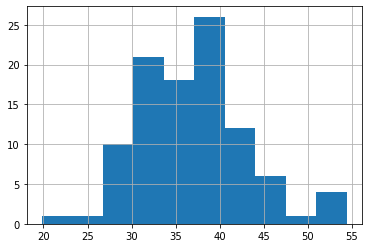

In [36]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

#### The mean of means
You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

amir_deals is available and the user data for all the company's deals is available in all_deals. Both pandas as pd and numpy as np are loaded.

In [46]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals["num_users"].sample(20, replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals["num_users"]))

38.821666666666665
37.651685393258425


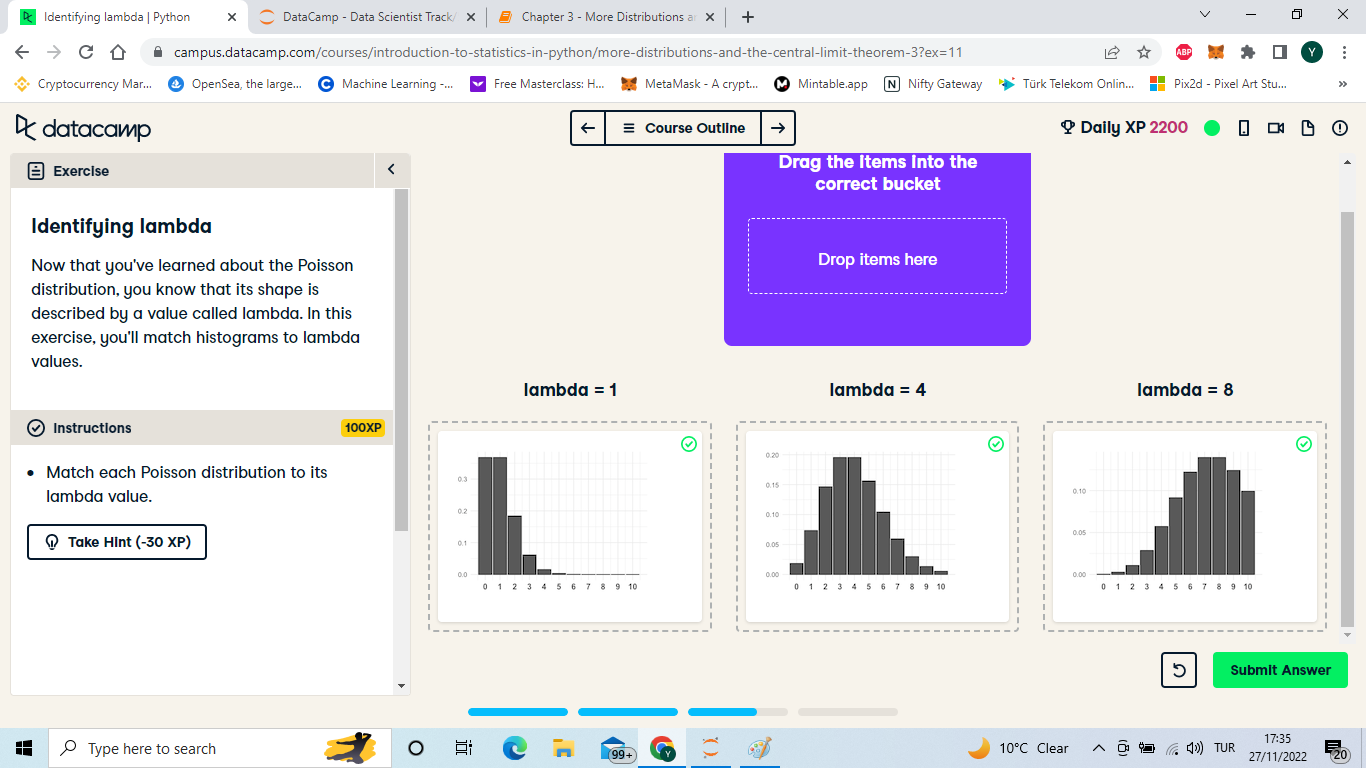

#### Tracking lead responses
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads. 

In [44]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses on average of 4
prob_5 = poisson.pmf(5, 4) #pmf: probability mass function. P(5) is searched, 4 is average.
print("P(5):", prob_5, "\n")

# Probability of 5 responses on average of 5.5
prob_coworker = poisson.pmf(5,5.5) #pmf: probability mass function.P(5) is searched, 5.5 is average
print("P(5):", prob_coworker, "\n")

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4) #cdf: cumulative distribution function. P(k<2) is searched, 4 is average
print("P(k<2):", prob_2_or_less, "\n")

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)  #cdf: cumulative distribution function. P(k>10) is searched, 4 is average
print("P(k>10):", prob_over_10)

P(5): 0.1562934518505317 

P(5): 0.17140068409793663 

P(k<2): 0.23810330555354436 

P(k>10): 0.0028397661205137315


Perfect Poisson probabilities! Note that if you provide poisson.pmf() or poisson.cdf() with a non-integer, it throws an error since the Poisson distribution only applies to integers.

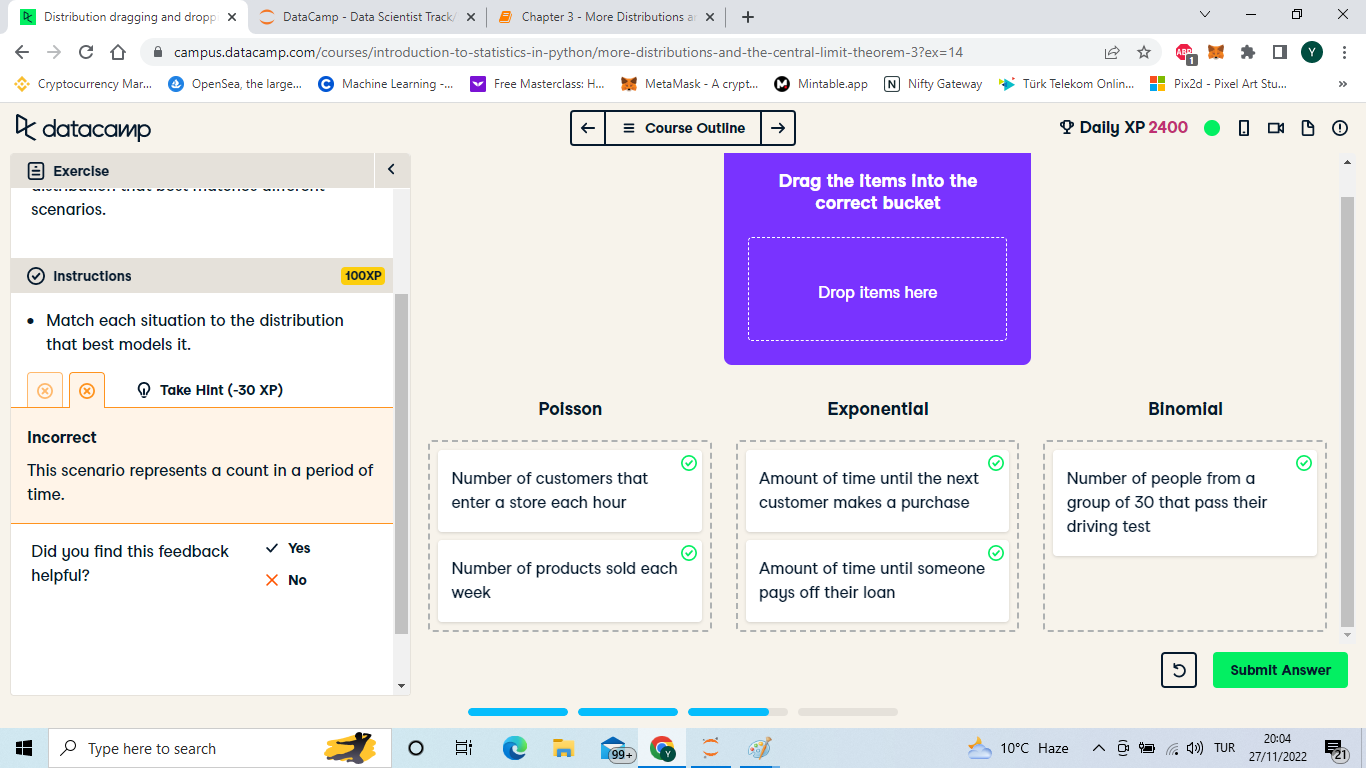

## Exponential Distributions

#### Modeling time between leads
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [51]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print("P(k<1):", expon.cdf(1, scale=2.5), "\n")

# Print probability response takes > 4 hours
print("P(k>4):", 1 - expon.cdf(4, scale = 2.5), "\n")

# Print probability response takes 3-4 hours
print("P(3<k<4):",expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5))

P(k<1): 0.3296799539643607 

P(k>4): 0.20189651799465536 

P(3<k<4): 0.09929769391754684


Excellent exponential computations! There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses.

#### The t-distribution
Which statement is not true regarding the t-distribution?

a.The t-distribution has thicker tails than the normal distribution.

b.A t-distribution with high degrees of freedom resembles the normal distribution.

c.The number of degrees of freedom affects the distribution's variance.

<strong>d.The t-distribution is skewed.</strong>
